## Simple Lin-Reg study

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./inp_data.csv', delimiter = ",")
X = df.values[:, :-1]           #Except last column
y = df.values[:, -1]

#Fit the line
fit = LinearRegression().fit(X, y)
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

m = [1.7867224]
b = [-16.51923513]


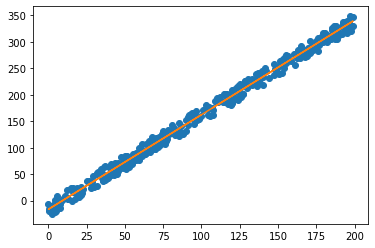

In [3]:
#Show the chart
plt.plot(X, y, 'o')
plt.plot(X, m*X + b)
plt.show()

In [4]:
#import reference test points
points = pd.read_csv('./inp_ref.csv', delimiter = ",").itertuples()
m = 1.9333
b = 4.7333
for p in points:
    y_actual = p.y
    y_predict = m * p.x + b
    residual = y_actual - y_predict
    print(residual)

-1.6665999999999999
1.4001000000000001
-0.5332000000000008
2.5335
-0.39979999999999905
-1.3331000000000017
0.7335999999999991
-2.1997
2.867000000000001
-1.0662999999999982


## Sum of squares

In [5]:
#import reference test points
points = pd.read_csv('./inp_ref.csv', delimiter = ",").itertuples()
m = 1.9333
b = 4.7333

sum_of_squares = 0.0

for p in points:
    y_actual = p.y
    y_predict = m * p.x + b
    residual_squared = (y_actual - y_predict)**2
    sum_of_squares += residual_squared

print("Sum of squares = {}".format(sum_of_squares))

Sum of squares = 28.111289450000005


## Inverse and Transpose

[1.93939394 4.73333333]
[ 6.67272727  8.61212121 10.55151515 12.49090909 14.43030303 16.36969697
 18.30909091 20.24848485 22.18787879 24.12727273]


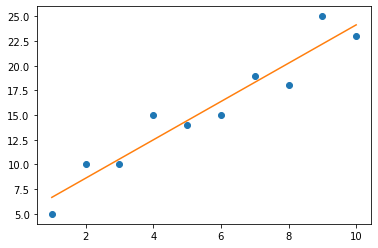

In [7]:
from numpy.linalg import inv
import numpy as np
#import reference data
df = pd.read_csv('./inp_ref.csv', delimiter = ",")

X = df.values[:, :-1].flatten()
X_1 = np.vstack([X, np.ones(len(X))]).T
Y = df.values[:, -1]

#Calculate slope and intercept coefficients
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b)

#Predict against values
y_predict = X_1.dot(b)
print(y_predict)
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, '-')
plt.show()